<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Neural Networks

## *Data Science Unit 4 Sprint 2 Assignment 1*

## Define the Following:
- You can add image, diagrams, whatever you need to ensure that you understand the concepts below.
- Layer: sort of cells in that column
### Input (Visible) Layer: A layer that receives input from dataset to be passed to network
### Hidden Layer: The layer in between input and output. Hyperparameter, functions
### Output Layer: Output vector of values
### Recurrent Layer: A loop that receives input from their own output
### Neuron (nodes): A function that receives an input and pass it to the next layer of nodes if a certain threshold is reached
### Weight: Modifies input to report output
### Activation Function: Transform output value into format that fits the context
### Node Map: Flow chart that shows the path from inputs to outputs
### Perceptron: First and simplest kind of neural network, a single node of neural network


## Inputs -> Outputs

### Explain the flow of information through a neural network from inputs to outputs. Be sure to include: inputs, weights, bias, and activation functions. How does it all flow from beginning to end?

#### Inputs -> Transform inputs with weights and bias -> go through activation functions -> output

## Write your own perceptron code that can correctly classify a NAND (not and) gate. 

| x1 | x2 | y |
|----|----|---|
| 0  | 0  | 1 |
| 1  | 0  | 1 |
| 0  | 1  | 1 |
| 1  | 1  | 0 |

In [77]:
import numpy as np

np.random.seed(42)

# Establish training data
inputs = np.array([
    [0,0],
    [1,0],
    [0,1],
    [1,1]
])

correct_outputs = [[1],[1],[1],[0]]

In [78]:
# Sigmoid activation function and its derivative for updating weights
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [79]:
# Initialize random weights for our three inputs
weights = 2 * np.random.random((2,1)) - 1
weights

array([[-0.25091976],
       [ 0.90142861]])

In [80]:
# Create biases for node map
b = np.zeros(inputs.shape[0])
b

array([0., 0., 0., 0.])

In [81]:
# Calculate weighted sum of inputs and weights
weighted_sum = np.dot(inputs, weights)
weighted_sum

array([[ 0.        ],
       [-0.25091976],
       [ 0.90142861],
       [ 0.65050885]])

In [82]:
# Output the activated value for the end of 1 training epoch
activated_output = sigmoid(weighted_sum)
activated_output

array([[0.5       ],
       [0.43759713],
       [0.71124299],
       [0.65712512]])

In [83]:
# take difference of output and true values to calculate error
error = correct_outputs - activated_output
error

array([[ 0.5       ],
       [ 0.56240287],
       [ 0.28875701],
       [-0.65712512]])

In [84]:
# Gradient descent/backprop - magic!
adjustments = error * sigmoid_derivative(activated_output)
adjustments

array([[ 0.11750186],
       [ 0.1340789 ],
       [ 0.0637777 ],
       [-0.147749  ]])

In [85]:
# adjust weights base on inputs
weights += np.dot(inputs.T, adjustments)
weights

array([[-0.26458986],
       [ 0.81745731]])

In [86]:
# steps we've already done:
# 1. randomly initialized weights already. Those are in memory as `weights`
# 2. we've already got input data & correct_outputs

# update our weights 100 times
for iteration in range(100):
    
    # weighted sum of inputs/weights
    weighted_sum = np.dot(inputs, weights) + b.reshape(-1,1)
    
    # activate!
    activated_output = sigmoid(weighted_sum)
    
    # calc error
    error = correct_outputs - activated_output
    
    adjustments = error * sigmoid_derivative(activated_output)
    
    # update the weights
    weights += np.dot(inputs.T, adjustments)
    
    # update bias
    b += np.sum(adjustments, axis=1)
    
print('Weights after training:\n', weights)
print('Output after training\n', activated_output)

Weights after training:
 [[-0.25880185]
 [ 0.28558159]]
Output after training
 [[0.9498611 ]
 [0.94908241]
 [0.94941268]
 [0.04103571]]


## Implement your own Perceptron Class and use it to classify a binary dataset like: 
- [The Pima Indians Diabetes dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv) 
- [Titanic](https://raw.githubusercontent.com/ryanleeallred/datasets/master/titanic.csv)
- [A two-class version of the Iris dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/Iris.csv)

You may need to search for other's implementations in order to get inspiration for your own. There are *lots* of perceptron implementations on the internet with varying levels of sophistication and complexity. Whatever your approach, make sure you understand **every** line of your implementation and what its purpose is.

In [38]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/titanic.csv", index_col=None)
df = df.drop(columns='Unnamed: 0')
print(df.shape)
df.head()

(891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [51]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [50]:
df['age'] = df['age'].fillna(df['age'].mean())

In [40]:
y = np.array(df['survived'].values)
print(len(y))
y[:10]

891


array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

In [52]:
X = df.iloc[:, [3, 6]].values
X

array([[22.        ,  7.25      ],
       [38.        , 71.2833    ],
       [26.        ,  7.925     ],
       ...,
       [29.69911765, 23.45      ],
       [26.        , 30.        ],
       [32.        ,  7.75      ]])

In [62]:
class Perceptron(object):
  def __init__(self, rate = 0.01, niter = 10):
    self.rate = rate
    self.niter = niter

  def fit(self, X, y):
    """Fit training data
    X : Training vectors, X.shape : [#samples, #features]
    y : Target values, y.shape : [#samples]
    """

    # weights
    self.weight = np.zeros(1 + X.shape[1])

    # Number of misclassifications
    self.errors = []  # Number of misclassifications

    for i in range(self.niter):
      err = 0
      for xi, target in zip(X, y):
        delta_w = self.rate * (target - self.predict(xi))
        self.weight[1:] += delta_w * xi
        self.weight[0] += delta_w
        err += int(delta_w != 0.0)
      self.errors.append(err)
    return self

  def net_input(self, X):
    """Calculate net input"""
    return np.dot(X, self.weight[1:]) + self.weight[0]

  def predict(self, X):
    """Return class label after unit step"""
    return np.where(self.net_input(X) >= 0.0, 1, -1)

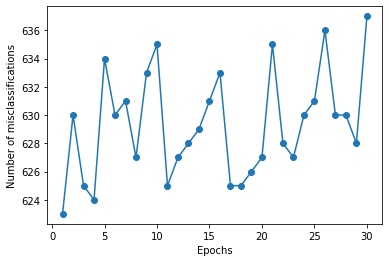

In [69]:
import matplotlib.pyplot as plt

pn = Perceptron(0.5, 30)
pn.fit(X, y)
plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

## Stretch Goals:

- Research "backpropagation" to learn how weights get updated in neural networks (tomorrow's lecture). 
- Implement a multi-layer perceptron. (for non-linearly separable classes)
- Try and implement your own backpropagation algorithm.
- What are the pros and cons of the different activation functions? How should you decide between them for the different layers of a neural network?